---
title: "2.8 Steering a Mobile Robot"
subject: Vector Spaces and Bases
subtitle: linear algebra for robot control
short_title: "2.8 Case Study: Mobile robot"
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: nodes, edges, Kirchoff's law
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

Our goal will be to steer a mobile robot to a desired position. Examples of mobile robots are shown below. On the left is a mobile robot research platform used by GRASP lab, while on the right is a roomba vaccuum cleaner. 
```{image} mobilerobot.png
:alt: He divided by zero
:width: 350px
:align: center
```

```{image} roomba.png
:alt: He divided by zero
:width: 690px
:align: center
```
We first develop a model of the mobile robot. We assume that the robot moves in $\mathbb{R}^2$ with its $x$-position denoted $p_x$ and $y$-position denoted $p_y$. We gather these two coordinates together and write them as a vector $$ \mathbf{p} := \begin{pmatrix} p_x \\ p_y \end{pmatrix}, $$ 
which is typically called the state of the robot. Because we are modeling a mobile robot, its position/state changes with time. We discretize time into uniform samples. So, we let $\delta t > 0$ be some base unit or duration of time, typically small, and define $ t_0, t_1, t_2, \ldots, t_k, \ldots $, where $ t_k := k \delta t $. We denote the robot’s position at time $ t_k $ by $$ \mathbf{p}_k := \begin{pmatrix} p_{x,k} \\ p_{y,k} \end{pmatrix}; $$
in other words, the subscript $ k $ keeps track of time. With this notation, $ \mathbf{p}_0 $ will be the initial position of the robot in the plane (i.e., in $\mathbb{R}^2$) at time $ t_0 $.

The next thing we posit is that our mobile robot has “dynamics”, meaning that its state at time $t_{k+1}$ can be expressed as a function of its state at time $t_k$ and any motor commands that we provide. A reasonably accurate model for the motion of a mobile robot can be captured by 
$$ \mathbf{p}_{k+1} = A \mathbf{p}_k + B \mathbf{u}_k, $$
where $\mathbf{u}_k \in \mathbb{R}^2$ is a pair of motor commands, the $2 \times 2$ matrix $B$ distributes the motor commands to effect motion of the robot (that is, change its next position), and $A$ is a $2 \times 2$ matrix that in a realistic model would capture the mass of the robot, the inertia of rotating parts, and other effects from physics.
Even though the following values are not so realistic, we’ll go ahead and assume that $$\delta t = 0.1, \quad A = I_{2 \times 2} + \delta t\begin{pmatrix} 0.0 & -0.5 \\ 0.5 & 0.0 \end{pmatrix}, \textrm{  and  } B = \delta t I_{2 \times 2}, $$
so that we can focus on the process of steering the robot and not the complexity of the robot’s model.

````{exercise} 
:label: my-exercise
**Why do we want a model?**
```{solution} my-exercise
:class: dropdown
So that we can predict the future behavior of the robot.
```
````

Not only do we have a way to compute the state at the next time instant based on the current state and current input, we can also iterate forward and predict the state at some future time, say $N$, as a function of a hypothesized input sequence, $\{ \mathbf{u}_0, \mathbf{u}_1, \ldots, \mathbf{u}_{N-1} \}$ as follows:

$$
\begin{aligned}
    \label{eq:unrolledDyn}
    \mathbf{p}_0 &= \text{given initial position} \\
    \mathbf{p}_1 &= A \mathbf{p}_0 + B \mathbf{u}_0 \\
    \mathbf{p}_2 &= A \mathbf{p}_1 + B \mathbf{u}_1 = A(A \mathbf{p}_0 + B \mathbf{u}_0) + B \mathbf{u}_1 = A^2 \mathbf{p}_0 + AB \mathbf{u}_0 + B \mathbf{u}_1 \\
    \mathbf{p}_3 &= A \mathbf{p}_2 + B \mathbf{u}_2 = A(A^2 \mathbf{p}_0 + AB \mathbf{u}_0 + B \mathbf{u}_1) + B \mathbf{u}_2 \\
                 &= A^3 \mathbf{p}_0 + A^2 B \mathbf{u}_0 + AB \mathbf{u}_1 + B \mathbf{u}_2 \\
    &\vdots \\
    \mathbf{p}_N &= A^N \mathbf{p}_0 + A^{N-1} B \mathbf{u}_0 + A^{N-2} B \mathbf{u}_1 + \cdots + AB \mathbf{u}_{N-2} + B \mathbf{u}_{N-1}
\end{aligned}
$$

That’s a lot of symbols, but what do they tell us? Suppose we start the robot at 
$\mathbf{p}_0 := \begin{pmatrix} p_{x,0} \\ p_{y,0} \end{pmatrix} = \begin{pmatrix} 1.0 \\ 1.0 \end{pmatrix}$ 
and we set the motor commands to be identically zero. Then we can predict how the robot will move “on its own”. Below, we consider how the robot moves for 20 seconds (200 timesteps due to the timestep of $\delta t = 0.1$  seconds) without any motor commands.

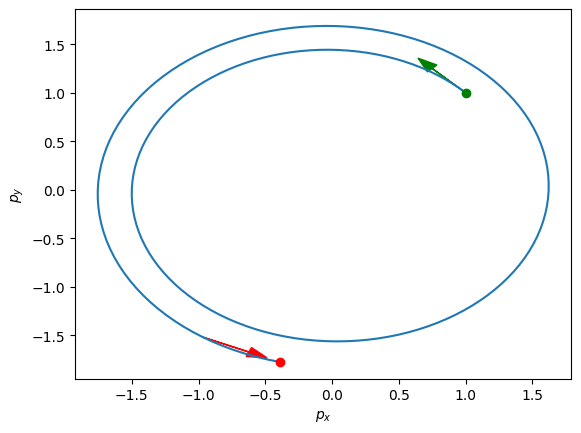

In [34]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
A = np.eye(2) + dt*np.array([[0, -0.5],[0.5, 0.0]])
B = dt*np.eye(2)

def simulate_robot(A,B, N, inputs, p_0):
    positions = np.zeros((N+1, 2))
    positions[0] = p_0
    for k in range(N):
        positions[k+1] = A@positions[k] + B@inputs[k]
    return positions

N = 200 #20 seconds with timestep of 0.1
inputs = np.zeros((N,2))
p_0 = np.array([1.0, 1.0])
positions = simulate_robot(A,B,N, inputs, p_0)

plt.plot(positions[:,0], positions[:,1])
plt.xlabel(r'$p_x$')
plt.ylabel(r'$p_y$')
plt.plot(positions[0,0], positions[0,1], 'go')   
plt.arrow(positions[0,0], positions[0,1], -5*(positions[0,0] - positions[1,0]), -5*(positions[0,0] - positions[1,1]), head_width=.1, color='green')
plt.plot(positions[-1,0], positions[-1,1], 'ro')
plt.arrow(positions[-8,0], positions[-8,1], -.6*(positions[-8,0] - positions[-1,0]), -.6*(positions[-8,1] - positions[-1,1]), head_width=.1, color='red')

It seems that the robot is spiraling out aimlessly from it's initial position. Let's try to add some direction to the robot. We will try to steer the robot from its initial position to the origin in two seconds. In particular, we will set $N = 20 = 2/(\delta t)$. Our goal is to steer the robot to the final position
$$ \mathbf{p}_N = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$ from the initial position $$\mathbf{p}_0 = \begin{bmatrix} 1 \\ 1\end{bmatrix}.$$ Then we are seeking a solution to the equation $$\mathbf p_N =  A^N \mathbf{p}_0 + A^{N-1} B \mathbf{u}_0 + A^{N-2} B \mathbf{u}_1 + \cdots + AB \mathbf{u}_{N-2} + B \mathbf{u}_{N-1},$$ where the unknowns are $(\mathbf u_0, \mathbf{u}_1, \dots, \mathbf{u}_{N-1})$. This can be rearranged as 
\begin{eqnarray} \label{eq:linsys}\mathbf p_N  - A^N \mathbf{p}_0 = \begin{bmatrix} A^{N-1} B & A^{N-2} B & \dots & A B & B \end{bmatrix} \begin{bmatrix} \mathbf u_0 \\ \mathbf u_1 \\ \vdots \\ \mathbf u_{N-1}\end{bmatrix}.\end{eqnarray}

Let us first make sure that the problem is well-posed, i.e. that there exists at least one sequence of inputs that steers us from $\mathbf p_0$ to $\mathbf{p}_N$. This can be verified by checking that the vector $\mathbf p_N  - A^N \mathbf p_0$ is in the column space of $\begin{bmatrix} A^{N-1} B & A^{N-2} B & \dots & A B & B \end{bmatrix}$. By the fact that the rightmost entry in this block matrix is $B = \delta t I$, we can set the sequence of inputs as $\mathbf{u}_0 = 0, \mathbf{u}_1 = 0, \dots \mathbf{u}_{N-2}=0$, and $\mathbf{u}_{N-1} = \frac{1}{\delta t} (\mathbf{p}_N - A^N \mathbf{p}_0)$. With this choice, the equation [](#eq:linsys) is satisfied. Therefore, there exists at least one solution. Let's check out that solution below.

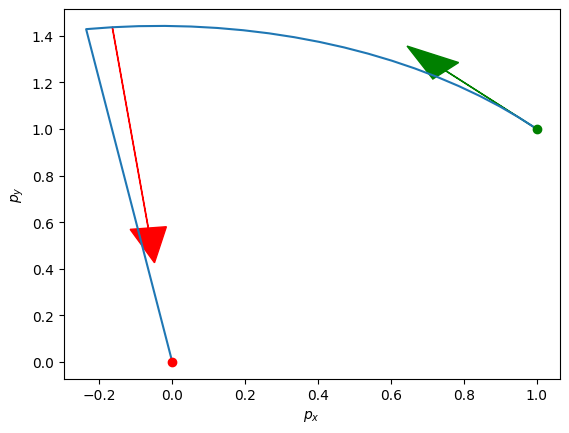

In [49]:
N = 20 #2  seconds with timestep of 0.1
simple_inputs = np.zeros((N,2))

p_0 = np.array([1.0, 1.0])
p_N = np.zeros(2)
simple_inputs[-1] = 1/(0.1)*(p_N - np.linalg.matrix_power(A, N)@p_0)
positions = simulate_robot(A,B,N, simple_inputs, p_0)

plt.plot(positions[:,0], positions[:,1])
plt.xlabel(r'$p_x$')
plt.ylabel(r'$p_y$')
plt.plot(positions[0,0], positions[0,1], 'go')   
plt.arrow(positions[0,0], positions[0,1], -5*(positions[0,0] - positions[1,0]), -5*(positions[0,0] - positions[1,1]), head_width=.1, color='green')
plt.plot(positions[-1,0], positions[-1,1], 'ro')
plt.arrow(positions[-3,0], positions[-3,1], -.6*(positions[-3,0] - positions[-1,0]), -.6*(positions[-3,1] - positions[-1,1]), head_width=.1, color='red')

We see that the robot begins by following it's natural dynamics. Then in the last $0.1$ seconds, the inputs supply a command that pushes the robot to the origin. Let's examine the commands.

In [50]:
print('input command: ', simple_inputs)

input command:  [[  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  3.07604237 -14.16965292]]


That's a big jump! We're supply no commands most of the time, and then applying a large input at the last possible opportunity. 
`````{exercise}
:label:underdetermined
Is this the only control input that could steer us to the origin?

```{solution} underdetermined
:class: dropdown
No! The system [](#eq:linsys) has two equations, but $2N = 40$ unknowns. It is therefore said that the system is *underdetermined*, as many solutions are possible. 
```
`````

Let's try expressing other possible solutions to [](#eq:linsys). We know that the above solution works. Let us call that solution $\mathbf u_{\mathsf{nom}} = \begin{bmatrix} 0 \\ 0 \\ \vdots \\0 \\ \mathbf{p}_N - A^N \mathbf{p}_0 \end{bmatrix}$. We are looking for other possible solutions $\mathbf{u}$ such that 
\begin{equation}\label{eq:compactLinSys}\mathbf{p}_N - A^N \mathbf{p}_0 = \begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix} \mathbf u.\end{equation}
As $$\mathbf{p}_N - A^N \mathbf{p}_0 = \begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix} \mathbf u_{\mathsf{nom}},$$
we may substitute $\begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix} \mathbf u_{\mathsf{nom}}$ for the left hand side of [](#eq:compactLinSys). Then we are looking for commands $\mathbf u$ satisfying the following equation. 

$$\begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix} \mathbf u_{\mathsf{nom}} = \begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix} \mathbf u$$

Rearranging, we are looking for vectors $\mathbf u$ such that 
$$ \mathbf 0= \begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix} (\mathbf u - \mathbf{u}_{\mathsf{nom}}),$$
which implies that $\mathbf u - \mathbf{u}_{\mathsf{nom}}$ must be in the null space of $\begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix}$. This recovers the conclusion of [this theorem](./035-kernel_image.ipynb#soln_thm). In particular, all solutions to [](#eq:compactLinSys) are given by $\mathbf u_{\mathsf{nom}} + \mathbf n$, where $\mathbf{n}$ is any element in the nullspace of $\begin{bmatrix} A^{N-1} B & A^{N-1} B & \dots & A B & B \end{bmatrix}$. Let's try randomly selecting a element from the nullspace, and using that to steer our robot. To select an element, we can first obtain a basis for the nullspace, as in [this example](./035-kernel_image.ipynb#null_eg_GE). Fortunately, scipy has provides us a way to compute such an element automatically by calling the function scipy.linalg.null_space. 

In [23]:
import scipy.linalg
stacked_dynamics = np.hstack([np.linalg.matrix_power(A, n)@B for n in range(N-1, -1, -1)])
null_basis = scipy.linalg.null_space(stacked_dynamics)
print('Null space dimension: ', null_basis.shape[1])

Null space dimension:  38


We see that the dimension of the null space is 38. We can therefore take an arbitrary 38 dimensional vector and map it to an element in the null space. We will do this below, and define our sequence of inputs using the resulting vector. 

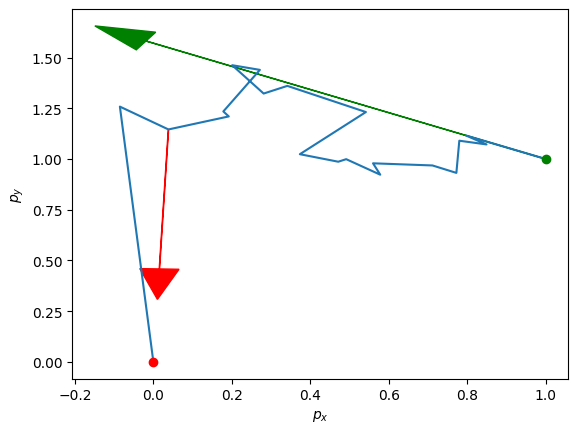

In [24]:
v = np.random.randn(38)
n = null_basis@v
inputs = simple_inputs + n.reshape((N,2))

positions = simulate_robot(A,B,N, inputs, p_0)

plt.plot(positions[:,0], positions[:,1])
plt.xlabel(r'$p_x$')
plt.ylabel(r'$p_y$')
plt.plot(positions[0,0], positions[0,1], 'go')   
plt.arrow(positions[0,0], positions[0,1], -5*(positions[0,0] - positions[1,0]), -5*(positions[0,0] - positions[1,1]), head_width=.1, color='green')
plt.plot(positions[-1,0], positions[-1,1], 'ro')
plt.arrow(positions[-3,0], positions[-3,1], -.6*(positions[-3,0] - positions[-1,0]), -.6*(positions[-3,1] - positions[-1,1]), head_width=.1, color='red')

Well... we still get to the destination, but we've now taken a weird path because of our null space element was chosen randomly. To take a more reasonable path, we could instead try to add more desired midway points to pass through. Such points are called waypoints. Let's select a sequence of 4 waypoints, evenly spaced over the 2 seconds. As we have $N=20$ total timesteps, this means that we have a desired location for $\mathbf{p}_5,   \mathbf{p}_{10}, \mathbf{p}_{15}$ and $\mathbf{p}_{20}$. We will set these waypoints as follows:
* $\mathbf{p}_{5} = \begin{bmatrix} .75 \\ .75 \end{bmatrix}$
* $\mathbf{p}_{10} = \begin{bmatrix} .5 \\ .5 \end{bmatrix}$
* $\mathbf{p}_{15} = \begin{bmatrix} .25 \\ .25 \end{bmatrix}$
* $\mathbf{p}_{20} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

Using the expression for the dynamics from equation [](#eq:unrolledDyn), we have that for any $k$, $$\mathbf{p}_k = A^k \mathbf{p}_0 + \begin{bmatrix} A^{t-1} B & A^{t-2} B & \dots & A B & B & 0 & 0 & \dots & 0\end{bmatrix} \begin{bmatrix} \mathbf{u}_0 \\ \mathbf{u}_1 \\ \vdots \\ \mathbf{u}_{t-1} \\ \mathbf{u}_{t} \\ \vdots \\ \mathbf{u}_{N-1} \end{bmatrix}.$$

We may therefore stack up our waypoint constraints as 
\begin{equation}
 \begin{bmatrix} \mathbf{p}_5 - A^ 5 \mathbf{p}_0\\ \mathbf{p}_{10} - A^{10}\mathbf{p}_0 \\ \mathbf{p}_{15} - A^{15}\mathbf{p}_0 \\ \mathbf{p}_{20} - A^{10}\mathbf{p}_{20} \end{bmatrix} = \begin{bmatrix} A^4 B & A^3 B & \dots & A B & B & 0 &&&\dots &&& 0 \\
 A^9 B & A^8 B && \dots && A B & B & 0 && \dots && 0 \\ 
 A^{14} B & A^{13} B &&& \dots &&& A B & B & 0 & \dots & 0 \\
 A^{19} B & A^{18} B &&&&\dots &&&&& AB& B \\\end{bmatrix} \begin{bmatrix} \mathbf{u}_0 \\ \mathbf{u}_1 \\ \vdots \\ \mathbf{u}_{N-2} \\ \mathbf{u}_{N-1} \end{bmatrix}.
\end{equation}

As before, we can express our solution as any solution $\mathbf{u}_{\mathsf{waypoint}}$ plus $\mathbf{n}$, where $$\mathbf{n}\in\mathsf{Null}\left(\begin{bmatrix} A^4 B & A^3 B & \dots & A B & B & 0 &&&\dots &&& 0 \\
 A^9 B & A^8 B && \dots && A B & B & 0 && \dots && 0 \\ 
 A^{14} B & A^{13} B &&& \dots &&& A B & B & 0 & \dots & 0 \\
 A^{19} B & A^{18} B &&&&\dots &&&&& AB& B \\\end{bmatrix}\right). $$

 To find a vector $\mathbf{u}_{\mathsf{waypoint}} = \begin{bmatrix} \mathbf{u}_{0,\mathsf{waypoint}} \\ \mathbf{u}_{1,\mathsf{waypoint}} \\ \vdots \\ \mathbf{u}_{19,\mathsf{waypoint}}\end{bmatrix}$ to parametrize this solution, we may use an approach simliar to the one taken to solve $\mathbf{u}_{\mathsf{nom}}$. In particular, we may set 
 * $\mathbf{u}_{4,\mathsf{waypoint}} = \frac{1}{\delta t} (\mathbf p_5 - A^5 \mathbf p_0)$
 * $\mathbf{u}_{9,\mathsf{waypoint}} = \frac{1}{\delta t}(\mathbf p_{10} - A^{10} \mathbf p_0 - A^5 B  \mathbf{u}_{4,\mathsf{waypoint}})$
 * $\mathbf{u}_{14,\mathsf{waypoint}} = \frac{1}{\delta t}(\mathbf p_{15} - A^{15} \mathbf p_0 - A^5 B \mathbf{u}_{9,\mathsf{waypoint}} - A^{10} B  \mathbf{u}_{4,\mathsf{waypoint}})$
 * $\mathbf{u}_{19,\mathsf{waypoint}} = \frac{1}{\delta t}(\mathbf p_{20} - A^{20} \mathbf p_0 - A^5 B \mathbf{u}_{14,\mathsf{waypoint}} - A^{10} B \mathbf{u}_{9,\mathsf{waypoint}} -A^{15} B\mathbf{u}_{4,\mathsf{waypoint}})$

For all other $k$, $\mathbf{u}_{k, \mathsf{waypoint}}$ may be set to zero. The difference from our solution to finding $\mathbf{u}_{\mathsf{nom}}$ is that it was necessary to account for the impact of previous inputs on the dynamics when searching for the subsequent inputs. We check this solution by simulating the system below. We will set $\mathbf{n} = \mathbf{0}$. 

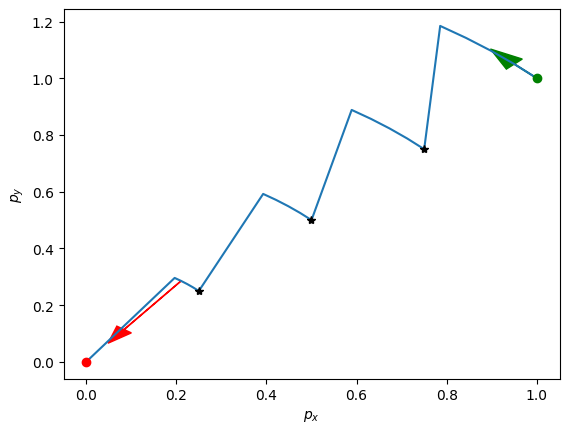

In [56]:
import numpy as np
import matplotlib.pyplot as plt

waypoint_inputs = np.zeros((N,2))

p_0 = np.array([1.0, 1.0])
waypoints = np.array([[0.75, 0.75], [0.5, 0.5], [0.25, 0.25], [0.0, 0.0]])
waypoint_inputs[4] = 1/dt*(waypoints[0] - np.linalg.matrix_power(A, 5)@p_0)
waypoint_inputs[9] = 1/dt*(waypoints[1] - np.linalg.matrix_power(A, 10)@p_0 - np.linalg.matrix_power(A, 5)@B@waypoint_inputs[4])
waypoint_inputs[14] = 1/dt*(waypoints[2] - np.linalg.matrix_power(A, 15)@p_0- np.linalg.matrix_power(A, 5)@B@waypoint_inputs[9]
    - np.linalg.matrix_power(A, 10)@B@waypoint_inputs[4])
waypoint_inputs[19] = 1/dt*(waypoints[3] - np.linalg.matrix_power(A, 20)@p_0- np.linalg.matrix_power(A, 5)@B@waypoint_inputs[14] 
    - np.linalg.matrix_power(A, 10)@B@waypoint_inputs[9] - np.linalg.matrix_power(A, 15)@B@waypoint_inputs[4])
positions = simulate_robot(A,B,N, waypoint_inputs, p_0)

plt.plot(positions[:,0], positions[:,1])
plt.xlabel(r'$p_x$')
plt.ylabel(r'$p_y$')
plt.plot(positions[0,0], positions[0,1], 'go') 

plt.plot(waypoints[0,0], waypoints[0,1], '*', color='black')   
plt.plot(waypoints[1,0], waypoints[1,1], '*', color='black')   
plt.plot(waypoints[2,0], waypoints[2,1], '*', color='black')    
plt.arrow(positions[0,0], positions[0,1], -1*(positions[0,0] - positions[1,0]), -1*(positions[0,0] - positions[1,1]), head_width=.05, color='green')
plt.plot(positions[-1,0], positions[-1,1], 'ro')
plt.arrow(positions[-3,0], positions[-3,1], -.6*(positions[-3,0] - positions[-1,0]), -.6*(positions[-3,1] - positions[-1,1]), head_width=.04, color='red')

Our commands still take us to the solution, but now we pass through the selected waypoints during the journey. Adding the constraints that our trajectory passes through the waypoints reduces the degrees of freedom for selecting $\mathbf{n}$. Below, we see that the dimension of the nullspace has now been reduce from $38$ to $32$, as we have added three more constraints, each with two equations. 

In [57]:
stacked_dynamics = np.zeros((8, 40))
for i, k in enumerate([5, 10, 15, 20]):
    stacked_dynamics_k = np.hstack([np.linalg.matrix_power(A, n)@B for n in range(k-1, -1, -1)])
    stacked_dynamics[2*i:(2*i+2), :stacked_dynamics_k.shape[1]] = stacked_dynamics_k
    
null_basis = scipy.linalg.null_space(stacked_dynamics)
print('Null space dimension: ', null_basis.shape[1])

Null space dimension:  32


A key question remaining is how we should choose $\mathbf{n}$. Setting it to zero leads to somewhat strange input sequences, where we only supply inputs at the time before we need to satisfy a waypoint constraint. Conversely, choosing it randomly leads to very strange behavior. To get more reasonable trajectories, we can consider trying to design the sequence of inputs that minimizes the enegy expenditure of the robot. The energy used by a robot that takes the sequence of actions $\mathbf{u}_0, \mathbf{u}_1, \dots, \mathbf{u}_{N-1}$ is given by the sum of squared elements in the input sequence. In particular, 
$$\mathbf{Energy}(\mathbf{u}_0, \mathbf{u}_1, \dots, \mathbf{u}_{N-1}) = \sum_{i=0}^{N-1} \mathbf{u}_{i, 1}^2 + \mathbf{u}_{i, 2}^2,$$ where $\mathbf{u}_{i, 1}$ and $\mathbf{u}_{i, 2}$ are the first and second commands of the input $\mathbf{u}_{i}$, respectively. 

We can therefore seek to find the minimum energy input sequence over the free variables
\begin{eqnarray}
\min_{\mathbf{x}} &\sum_{i=0}^{N-1} \mathbf{u}_{i, 1}^2 + \mathbf{u}_{i, 2}^2, \\
\textrm{ such that } & \begin{bmatrix} \mathbf{u}_0 \\  \mathbf{u}_1 \\ \vdots \\  \mathbf{u}_{N-1}\end{bmatrix} = \mathbf{u}_{\mathsf{waypoint}} + M x,
\end{eqnarray}
where the columns of $M$ are a basis for $$\mathsf{Null}\left(\begin{bmatrix} A^4 B & A^3 B & \dots & A B & B & 0 &&&\dots &&& 0 \\
 A^9 B & A^8 B && \dots && A B & B & 0 && \dots && 0 \\ 
 A^{14} B & A^{13} B &&& \dots &&& A B & B & 0 & \dots & 0 \\
 A^{19} B & A^{18} B &&&&\dots &&&&& AB& B \\\end{bmatrix}\right).$$
An optimization problem of this form is known as a least squares problem with linear constraints. We won't go over how to find the solution to such a problem in this course, but it is covered in MATH 1410. It turns out that the solutions is given by 
$$
x_\star = -(M^\top M)^{-1} M^\top \mathbf{u}_{\mathsf{waypoint}}.
$$
Let's test this solution out below. Recall that we already solved for a matrix whose columns are a basis for the null space in the above code cell, and the matrix is called ``null\_basis''.

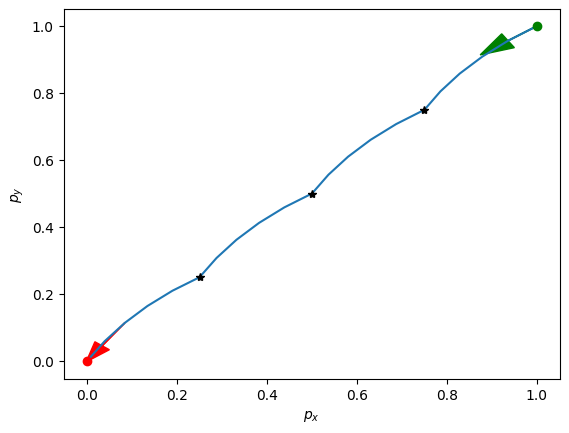

In [58]:
x_star = -np.linalg.inv(null_basis.T@null_basis)@null_basis.T@(waypoint_inputs.flatten())
n = null_basis@x_star
inputs = waypoint_inputs + n.reshape((N,2))

positions = simulate_robot(A,B,N, inputs, p_0)

plt.plot(positions[:,0], positions[:,1])
plt.xlabel(r'$p_x$')
plt.ylabel(r'$p_y$')
plt.plot(positions[0,0], positions[0,1], 'go') 

plt.plot(waypoints[0,0], waypoints[0,1], '*', color='black')   
plt.plot(waypoints[1,0], waypoints[1,1], '*', color='black')   
plt.plot(waypoints[2,0], waypoints[2,1], '*', color='black')    
plt.arrow(positions[0,0], positions[0,1], -1*(positions[0,0] - positions[1,0]), -1*(positions[0,0] - positions[1,1]), head_width=.05, color='green')
plt.plot(positions[-1,0], positions[-1,1], 'ro')
plt.arrow(positions[-3,0], positions[-3,1], -.6*(positions[-3,0] - positions[-1,0]), -.6*(positions[-3,1] - positions[-1,1]), head_width=.04, color='red')

Much better! By expressing the evolution of the robot's dynamics as a matrix, enforcing several waypoints that we want the robot to pass through, and using the minimum energy control sequence to steer the robot through all of the waypoints, we get a much smoother trajectory. Similar approaches can be taken for planning the motor commands in more complex robots such as quadrotors. You will see more about this if you take robotics course like MEAM 6200!